Here, we will combine Ferromagnetic ("FM") and Ferrimagnetic ("FiM") to a single class: "FerroLike"

In [20]:
import pandas as pd

df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

#visualizing the data
print("Data Overview:")
df.head()         # First 5 rows
df.tail()         # Last 5 rows
df.sample(8)      # Random 8 rows


Data Overview:


,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,...,symmetry,structure,efermi,cbm,vbm,formation_energy_per_atom,energy_above_hull,is_gap_direct,is_stable,parsed_elements
68314,mp-1206150,Sr2(SbPt)3,0.0000,FM,3,93.637443,"[Element Pt, Element Sb, Element Sr]",749.099546,8,Sr2 Sb3 Pt3,...,crystal_system=<CrystalSystem.tet: 'Tetragonal...,Full Formula (Sr2 Sb3 Pt3)\nReduced Formula: S...,-1.640710,NaN,NaN,1.139196,1.991440,False,False,"['Pt', 'Sb', 'Sr']"
56205,mp-1221229,Na4Eu2SiP4,0.0000,FM,4,24.233612,"[Element Eu, Element Na, Element P, Element Si]",533.139473,22,Na8 Eu4 Si2 P8,...,crystal_system=<CrystalSystem.mono: 'Monoclini...,Full Formula (Na8 Eu4 Si2 P8)\nReduced Formula...,3.629382,NaN,NaN,-0.664113,0.000000,False,True,"['Eu', 'Na', 'P', 'Si']"
31336,mp-1184032,GaFeO3,0.0000,FM,3,10.842013,"[Element Fe, Element Ga, Element O]",54.210064,5,Ga1 Fe1 O3,...,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Ga1 Fe1 O3)\nReduced Formula: Ga...,3.262752,NaN,NaN,-1.046784,0.941260,False,False,"['Fe', 'Ga', 'O']"
60408,mp-1186328,NdSmMg2,0.0000,NM,3,28.911067,"[Element Mg, Element Nd, Element Sm]",115.644269,4,Nd1 Sm1 Mg2,...,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Nd1 Sm1 Mg2)\nReduced Formula: N...,3.202557,NaN,NaN,-0.082476,0.006677,False,False,"['Mg', 'Nd', 'Sm']"
90003,mp-2240284,La2MgMnZnO6,1.8657,FM,5,14.523582,"[Element La, Element Mg, Element Mn, Element O...",159.759406,11,La2 Mg1 Mn1 Zn1 O6,...,crystal_system=<CrystalSystem.trig: 'Trigonal'...,Full Formula (La2 Mg1 Mn1 Zn1 O6)\nReduced For...,4.418967,6.2483,4.3826,-2.856684,0.169302,False,False,"['La', 'Mg', 'Mn', 'O', 'Zn']"
10079,mp-1209452,Rb2TmCl5,4.9769,NM,3,31.205030,"[Element Cl, Element Rb, Element Tm]",998.560950,32,Rb8 Tm4 Cl20,...,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Rb8 Tm4 Cl20)\nReduced Formula: ...,-1.208799,3.7823,-1.1946,-2.542894,0.000000,True,True,"['Cl', 'Rb', 'Tm']"
84615,mp-1215223,ZrNbB2,0.0000,NM,3,12.561123,"[Element B, Element Nb, Element Zr]",50.244491,4,Zr1 Nb1 B2,...,crystal_system=<CrystalSystem.ortho: 'Orthorho...,Full Formula (Zr1 Nb1 B2)\nReduced Formula: Zr...,5.856702,NaN,NaN,-0.770213,0.043429,False,False,"['B', 'Nb', 'Zr']"
15623,mp-1235672,BaLiV2Ni3(HO5)2,0.0000,FM,6,11.661346,"[Element Ba, Element H, Element Li, Element Ni...",221.565581,19,Ba1 Li1 V2 Ni3 H2 O10,...,crystal_system=<CrystalSystem.tri: 'Triclinic'...,Full Formula (Ba1 Li1 V2 Ni3 H2 O10)\nReduced ...,3.858077,NaN,NaN,-1.846929,0.193194,False,False,"['Ba', 'H', 'Li', 'Ni', 'O', 'V']"


Now, we do SVM on selected features.

First, without Categorical features to compare.

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.54527494 0.54984897 0.55216653 0.55271382]
Mean CV F1_macro: 0.550001064031082
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.14      0.71      0.23       547
   FerroLike       0.86      0.54      0.66      6588
          NM       0.74      0.78      0.76      4107

    accuracy                           0.63     11242
   macro avg       0.58      0.68      0.55     11242
weighted avg       0.78      0.63      0.68     11242



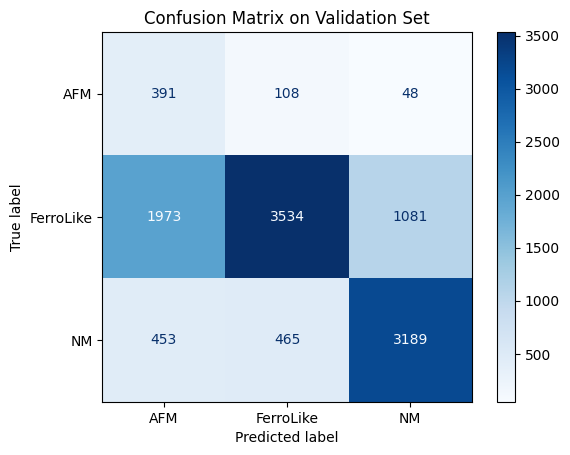

In [16]:
#Without Categorical features.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Drop NA and combine FM + FiM → FerroLike ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]

df = df.dropna(subset=numerical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 3. Combine features ===
X = df[numerical_features].reset_index(drop=True)

# === 4. Encode labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])

# === 5. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 6. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced"))
])

# === 7. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 8. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 9. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

# === 10. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


We do hyperparameter tuning using Numerical Features alone to consume time and storage.

Train size: 33723, Validation size: 11242, Test size: 11242
Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 2.6min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 2.6min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 2.6min
[CV] END .........................svm__C=0.1, svm__gamma=0.1; total time= 2.6min
[CV] END ........................svm__C=0.1, svm__gamma=0.05; total time= 2.7min
[CV] END ........................svm__C=0.1, svm__gamma=0.05; total time= 2.7min
[CV] END ........................svm__C=0.1, svm__gamma=0.05; total time= 2.7min
[CV] END ........................svm__C=0.1, svm__gamma=0.05; total time= 2.7min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time= 2.9min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total time= 2.9min
[CV] END ........................svm__C=0.1, svm__gamma=0.01; total t

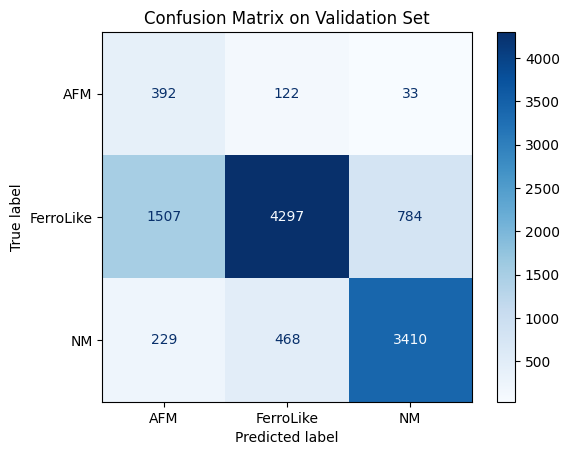

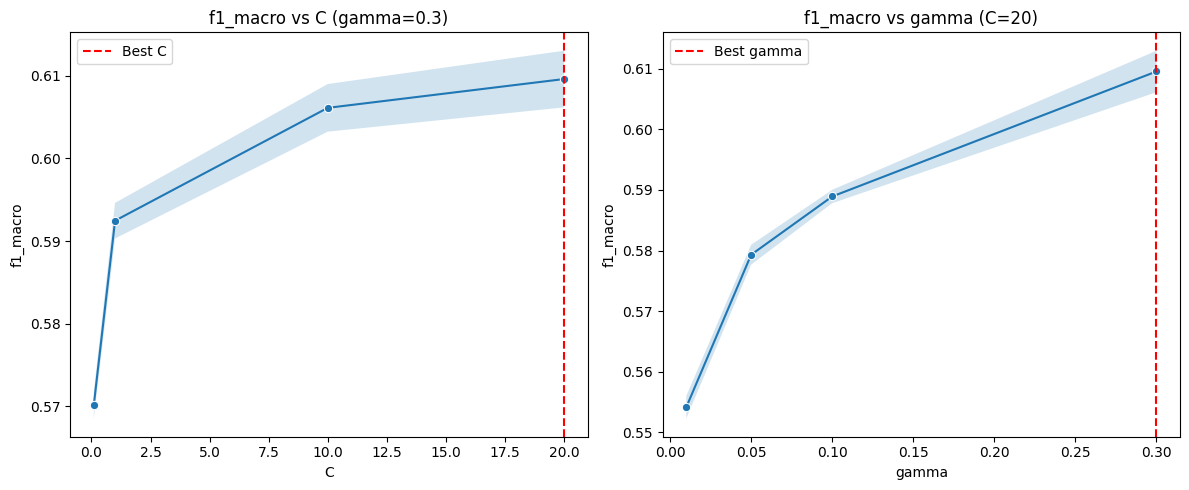

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Drop NA and combine FM + FiM → FerroLike ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom"]
df = df.dropna(subset=numerical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 3. Features and Labels ===
X = df[numerical_features].reset_index(drop=True)
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 4. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 5. SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", class_weight="balanced"))
])

# === 6. Hyperparameter Grid ===
param_grid = {
    "svm__C": [0.1, 1, 10, 20],
    "svm__gamma": [0.01, 0.05, 0.1, 0.3]
}

# === 7. GridSearchCV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# === 8. Best Model ===
print("Best Parameters:", grid_search.best_params_)
print("Best CV f1_macro Score:", grid_search.best_score_)

# === 9. Evaluate on Validation Set ===
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

# === 10. Plot f1_macro vs C and gamma ===
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 5))

# --- Plot 1: f1_macro vs C (best gamma fixed) ---
plt.subplot(1, 2, 1)
gamma_fixed = grid_search.best_params_["svm__gamma"]
subset_C = results_df[results_df["param_svm__gamma"] == gamma_fixed]
sns.lineplot(x="param_svm__C", y="mean_test_score", data=subset_C, marker="o")
plt.fill_between(
    subset_C["param_svm__C"].astype(float),
    subset_C["mean_test_score"] - subset_C["std_test_score"],
    subset_C["mean_test_score"] + subset_C["std_test_score"],
    alpha=0.2
)
plt.axvline(grid_search.best_params_["svm__C"], color="red", linestyle="--", label="Best C")
plt.title(f"f1_macro vs C (gamma={gamma_fixed})")
plt.xlabel("C")
plt.ylabel("f1_macro")
plt.legend()

# --- Plot 2: f1_macro vs gamma (best C fixed) ---
plt.subplot(1, 2, 2)
C_fixed = grid_search.best_params_["svm__C"]
subset_gamma = results_df[results_df["param_svm__C"] == C_fixed]
sns.lineplot(x="param_svm__gamma", y="mean_test_score", data=subset_gamma, marker="o")
plt.fill_between(
    subset_gamma["param_svm__gamma"].astype(float),
    subset_gamma["mean_test_score"] - subset_gamma["std_test_score"],
    subset_gamma["mean_test_score"] + subset_gamma["std_test_score"],
    alpha=0.2
)
plt.axvline(grid_search.best_params_["svm__gamma"], color="red", linestyle="--", label="Best gamma")
plt.title(f"f1_macro vs gamma (C={C_fixed})")
plt.xlabel("gamma")
plt.ylabel("f1_macro")
plt.legend()

plt.tight_layout()
plt.show()


We now include Categorical Variables like "Elements" and "Crystal_system". 

We expect the optimal parameters to change when we include Categorical variables. From previous GridSearchCV (see SVM_for_4_Magnetic_Classes) with Categorical variables, we expect C=10 and Gamma=0.01 to have a better mean F1_macro score of 0.61 that we got here.

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.69266483 0.68629376 0.69795759 0.69978199]
Mean CV F1_macro: 0.6941745413478363
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.23      0.63      0.33       547
   FerroLike       0.91      0.78      0.84      6588
          NM       0.92      0.91      0.91      4107

    accuracy                           0.82     11242
   macro avg       0.68      0.77      0.70     11242
weighted avg       0.88      0.82      0.84     11242



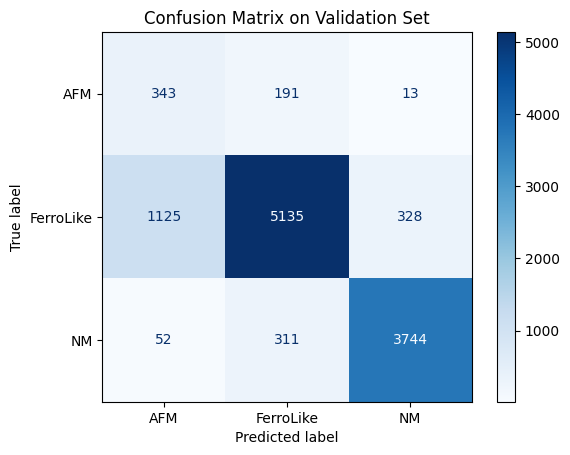

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Merge FM and FiM into FerroLike ===
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 5. drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=10, gamma=0.01, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


Mean CV F1_Macro score of 0.69 is better. Henceforth, we set C=10 and Gamma=0.01.

Low precision in AFM has to do with small number of materials. We now increase the number of AFM in the training set using SMOTE.

In [6]:
pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Train size: 33723, Validation size: 11242, Test size: 11242

Class counts after SMOTE:
FerroLike: 19761
AFM: 19761
NM: 12320


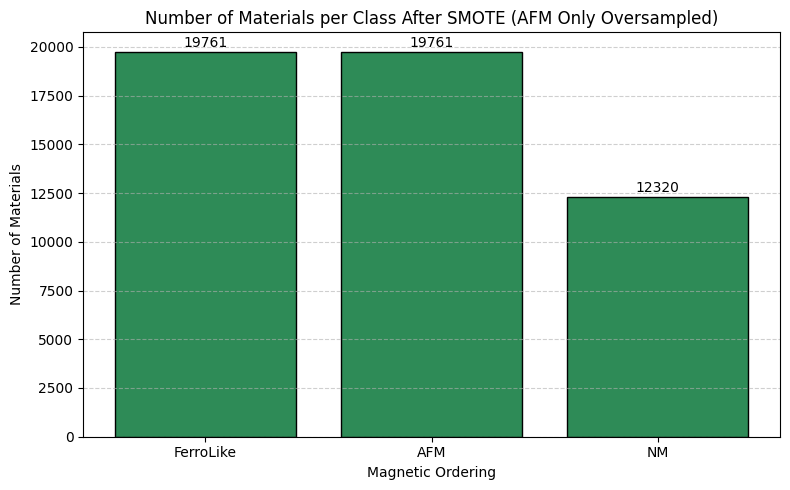


Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.33      0.26      0.29       547
   FerroLike       0.89      0.90      0.89      6588
          NM       0.91      0.91      0.91      4107

    accuracy                           0.87     11242
   macro avg       0.71      0.69      0.70     11242
weighted avg       0.87      0.87      0.87     11242



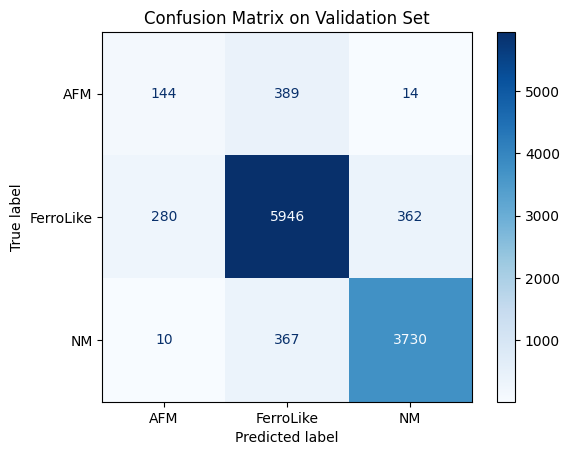

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]
df["elements"] = df["elements"].apply(parse_elements)

# === 3. Extract crystal_system from symmetry ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 4. Label encode crystal_system ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 5. Drop NA and merge FM + FiM → FerroLike ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
label_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Apply SMOTE only to AFM class ===
afm_index = list(label_names).index("AFM")
y_train_series = pd.Series(y_train)
afm_mask = y_train_series == afm_index

# Count max class size to upsample AFM to that
from collections import Counter
class_counts = Counter(y_train)
target_count = max(class_counts.values())

sampling_strategy = {afm_index: target_count}

smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# === 12. Define and train pipeline ===
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=10, gamma=0.01, kernel='rbf', class_weight='balanced'))
])
pipeline.fit(X_train_resampled, y_train_resampled)

# === 13. Print class counts after SMOTE ===
resampled_counts = pd.Series(y_train_resampled).value_counts().sort_values(ascending=False)
resampled_labels = le.inverse_transform(resampled_counts.index)

print("\nClass counts after SMOTE:")
for name, count in zip(resampled_labels, resampled_counts):
    print(f"{name}: {count}")

# === 14. Plot class distribution after SMOTE ===
plt.figure(figsize=(8, 5))
bars = plt.bar(resampled_labels, resampled_counts.values, color="seagreen", edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title("Number of Materials per Class After SMOTE (AFM Only Oversampled)")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Number of Materials")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# === 15. Evaluate on Validation Set ===
y_val_pred = pipeline.predict(X_val)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_names))

cm_val = confusion_matrix(y_val, y_val_pred)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_names)
disp_val.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()


AFM precision got better with SMOTE

Now, we determine feature importance. To do that we need to set Kernel to "linear".

Train size: 33723, Validation size: 11242, Test size: 11242
4-fold Stratified CV (F1_macro) scores on training set: [0.61081304 0.61668577 0.61886367 0.62227814]
Mean CV F1_macro: 0.6171601559454402
Validation Classification Report:
              precision    recall  f1-score   support

         AFM       0.16      0.76      0.27       547
   FerroLike       0.89      0.62      0.73      6588
          NM       0.86      0.86      0.86      4107

    accuracy                           0.71     11242
   macro avg       0.64      0.75      0.62     11242
weighted avg       0.84      0.71      0.75     11242



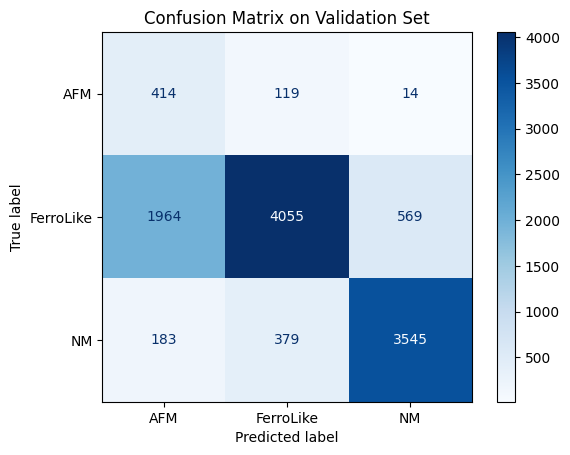

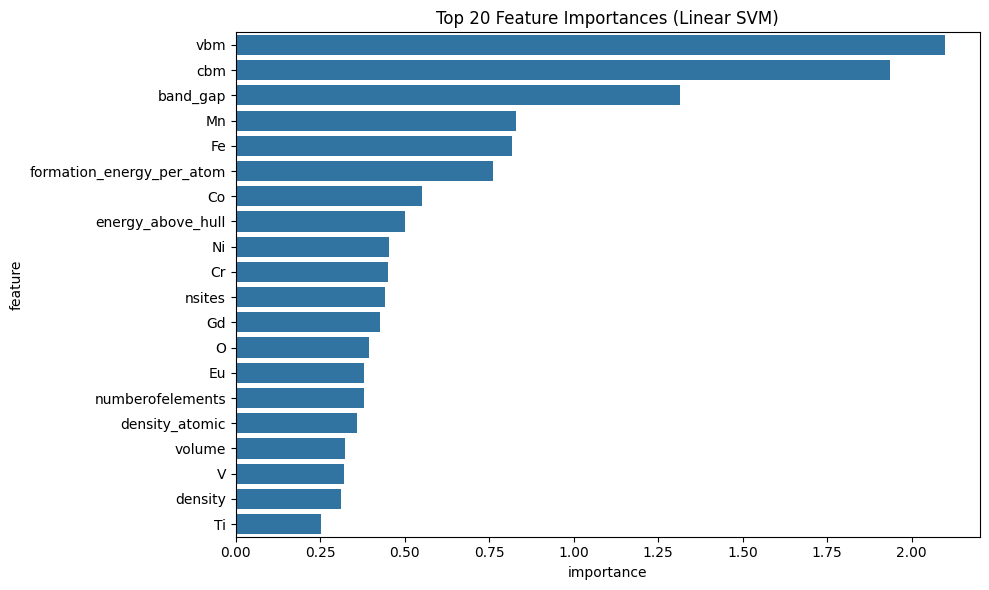

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import re

# === 1. Load dataset ===
df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")

# === 2. Parse 'elements' ===
def parse_elements(val):
    if pd.isna(val):
        return []
    return [e.strip().split()[-1] for e in str(val).strip("[]").split(",")]

df["elements"] = df["elements"].apply(parse_elements)

# === 3.1 Extract 'crystal_system' from 'symmetry' column ===
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# === 3.2 Label encode 'crystal_system' ===
crystal_encoder = LabelEncoder()
df["crystal_system_encoded"] = crystal_encoder.fit_transform(df["crystal_system"])

# === 4. Merge FM, AFM and FiM into Magnetic ===
df["ordering"] = df["ordering"].replace({"FM": "FerroLike", "FiM": "FerroLike"})

# === 5. Drop NA ===
numerical_features = ["band_gap", "numberofelements", "density_atomic", "volume", "efermi", "nsites", 
                      "density", "cbm", "vbm", "energy_above_hull", "formation_energy_per_atom", "crystal_system_encoded"]
categorical_features = ["is_gap_direct", "is_stable"]

df = df.dropna(subset=numerical_features + categorical_features + ["ordering"])

# === 6. One-hot encode 'elements' ===
mlb = MultiLabelBinarizer()
element_df = pd.DataFrame(mlb.fit_transform(df["elements"]), columns=mlb.classes_)

# === 7. One-hot encode other categorical fields ===
cat_df = pd.get_dummies(df[categorical_features], drop_first=False)

# === 8. Combine all features ===
X = pd.concat([
    df[numerical_features].reset_index(drop=True),
    element_df.reset_index(drop=True),
    cat_df.reset_index(drop=True)
], axis=1)

# === 9. Encode target labels ===
le = LabelEncoder()
y = le.fit_transform(df["ordering"])
class_names = le.classes_

# === 10. Train/Val/Test Split ===
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

# === 11. Define SVM Pipeline with linear kernel ===
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=10, class_weight="balanced"))
])

# === 12. Stratified K-Fold CV ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_pipeline, X_train, y_train, cv=cv, scoring="f1_macro")

print("4-fold Stratified CV (F1_macro) scores on training set:", cv_scores)
print("Mean CV F1_macro:", np.mean(cv_scores))

# === 13. Train final model ===
svm_pipeline.fit(X_train, y_train)

# === 14. Evaluate on Validation Set ===
y_val_pred = svm_pipeline.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=class_names))

# === 15. Confusion Matrix ===
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Validation Set")
plt.show()

# === 16. Plot Feature Importance ===
model = svm_pipeline.named_steps["svm"]
feature_names = X.columns
coefs = model.coef_

# Multiclass → take average absolute weight across classes
importance = np.abs(coefs).mean(axis=0)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importance
}).sort_values(by="importance", ascending=False)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(20), x="importance", y="feature")
plt.title("Top 20 Feature Importances (Linear SVM)")
plt.tight_layout()
plt.show()
